In [1]:
import pandas as pd
import seaborn as sns

# 1

In [2]:
player_df = pd.read_csv("players.csv").loc[:, 'surname':'saves']

In [3]:
player_df['shots'] /= player_df['minutes']
player_df['passes'] /= player_df['minutes']
player_df['tackles'] /= player_df['minutes']
player_df['saves'] /= player_df['minutes']

x = pd.Categorical(player_df.position, 
                   categories=['goalkeeper','defender','midfielder','forward'],
                  ordered=True)

player_df['position'] = x

In [4]:
player_df.sort_values('position', inplace=True)
player_df

,surname,team,position,minutes,shots,passes,tackles,saves
330,Stekelenburg,Netherlands,goalkeeper,540,0.000000,0.275926,0.000000,0.027778
204,Kingson,Ghana,goalkeeper,510,0.000000,0.205882,0.001961,0.039216
260,Marchetti,Italy,goalkeeper,225,0.000000,0.093333,0.000000,0.004444
54,Schwarzer,Australia,goalkeeper,270,0.000000,0.188889,0.000000,0.048148
385,Ri Myong-Guk,North Korea,goalkeeper,270,0.000000,0.170370,0.000000,0.070370
...,...,...,...,...,...,...,...,...
444,Zigic,Serbia,forward,227,0.022026,0.286344,0.008811,0.000000
181,Klose,Germany,forward,356,0.030899,0.233146,0.011236,0.000000
180,Kiessling,Germany,forward,7,0.000000,0.714286,0.000000,0.000000
200,Gyan,Ghana,forward,501,0.053892,0.301397,0.001996,0.000000


# 2

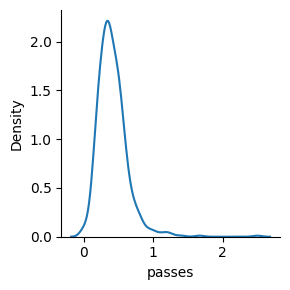

In [9]:
sns.displot(player_df.passes, kind='kde', height=3)

# 3

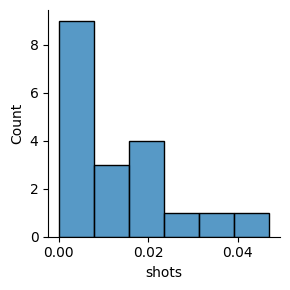

In [15]:
x = player_df[player_df['team'] == 'USA']['shots']
sns.displot(x, kind='hist', height=3)

# 4

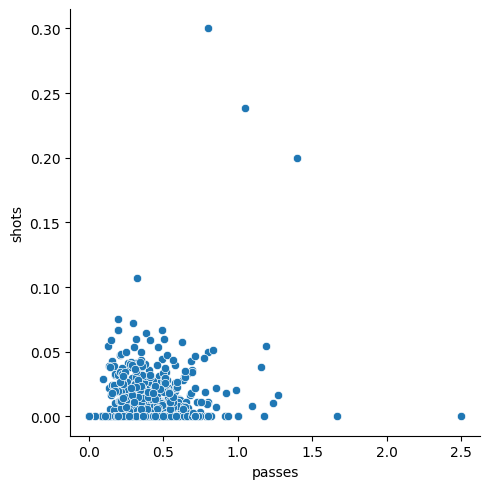

In [18]:
sns.relplot(x=player_df.passes, y=player_df.shots)

# 5

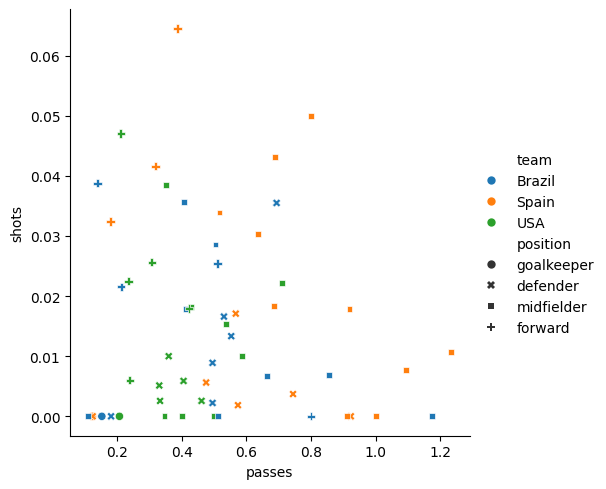

In [30]:
data = player_df.loc[player_df['team'].isin(['Brazil', 'Spain', 'USA'])]
sns.relplot(data, x='passes', y='shots', hue='team', style='position')

# 6

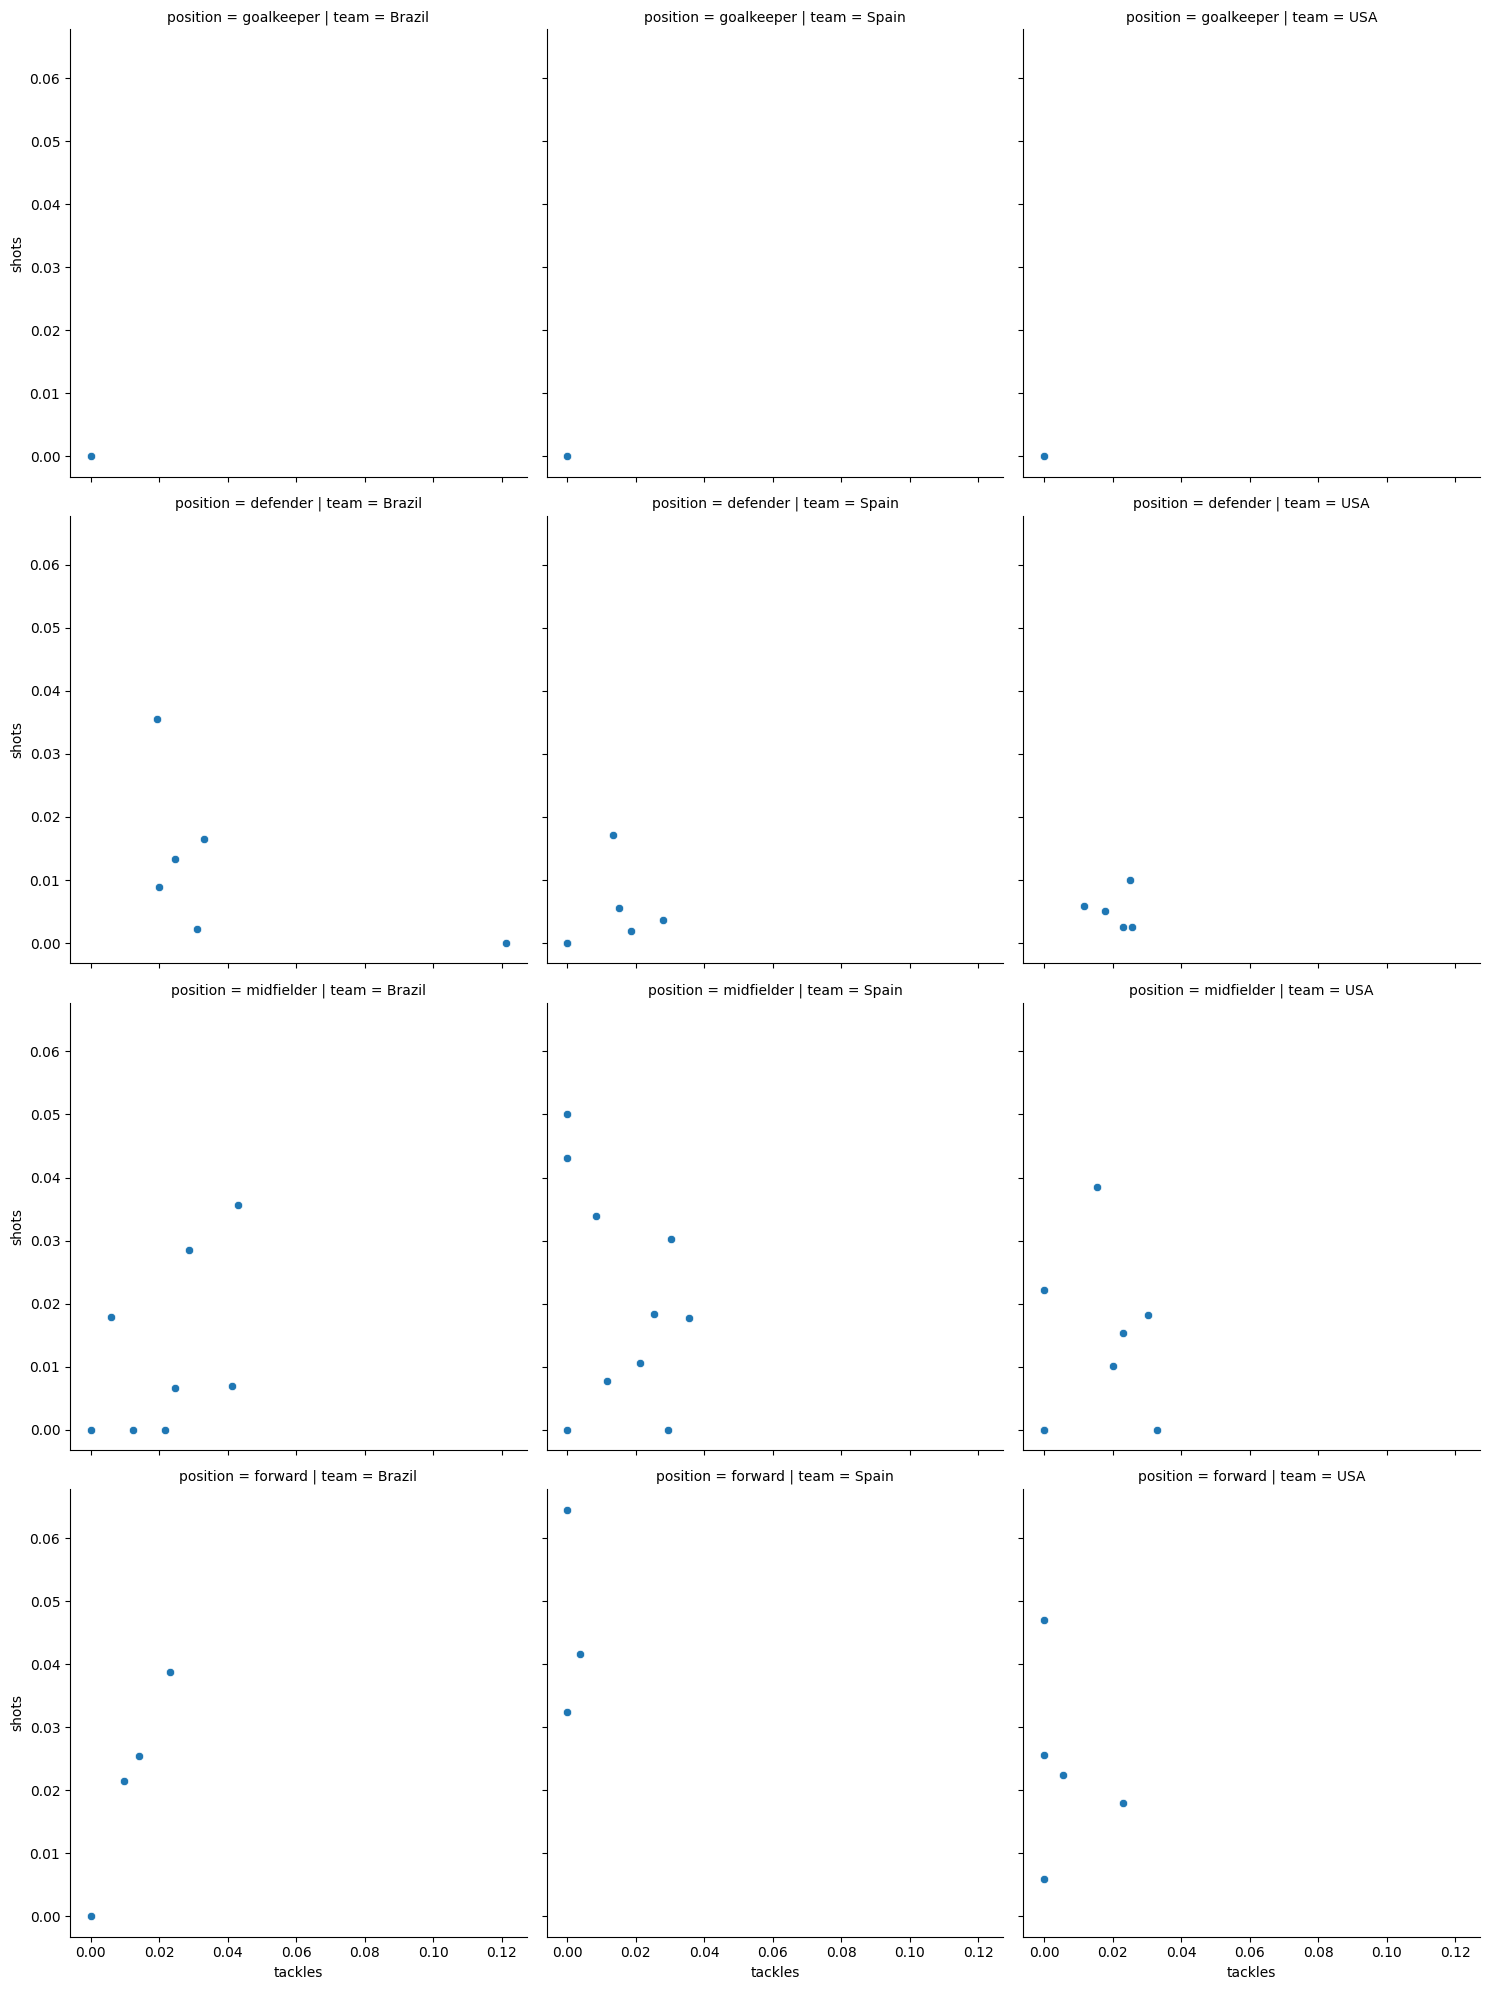

In [33]:
sns.relplot(data, x='tackles', y='shots', row='position', col='team')

# 7

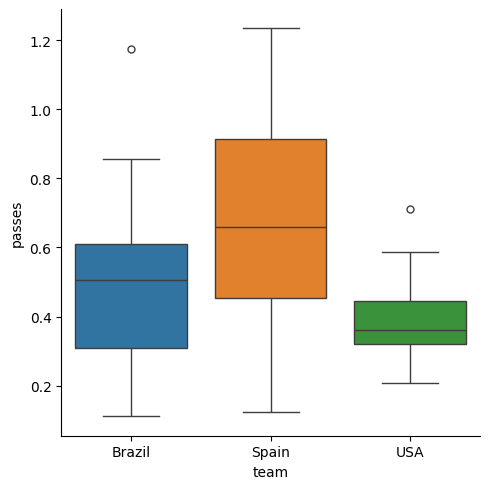

In [35]:
sns.catplot(data, x='team', y='passes', kind='box', hue='team')

# 8

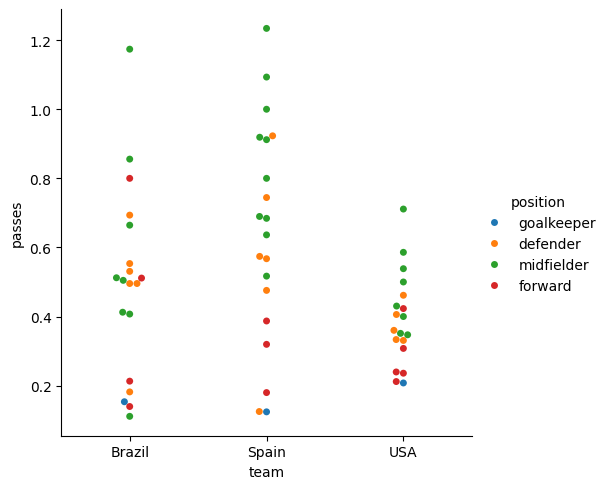

In [38]:
sns.catplot(data, x='team', y='passes', kind='swarm', hue='position')

# 9

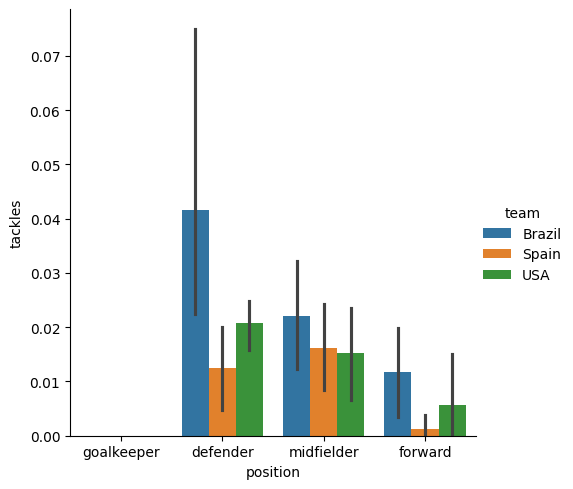

In [39]:
sns.catplot(data, x='position', y='tackles', hue='team', kind='bar')

# 10

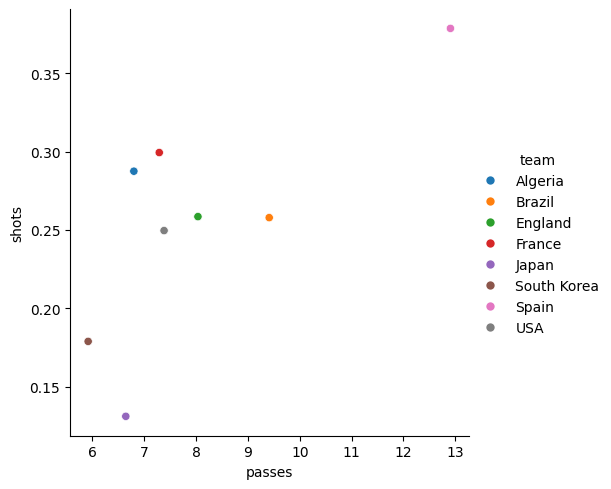

In [43]:
defined_team = ['Brazil','Japan','USA','Spain','Algeria','France','England','South Korea']
x = player_df.loc[player_df['team'].isin(defined_team)][['team','passes','shots']]
data2 = x.groupby('team').agg({'passes': 'sum', 'shots': 'sum'})

sns.relplot(data2, x='passes', y='shots', hue='team')

# 11

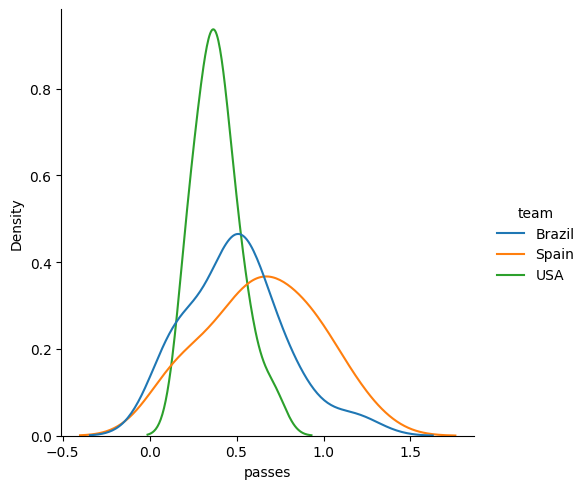

In [45]:
sns.displot(data, x='passes', hue='team',kind='kde')